In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("./titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 欄位定義
PassengerId:乘客唯一識別碼

Survived:表示乘客的生存狀態，0 表示未生還，1 表示生還。

Pclass:乘客的艙位等級，反映了乘客的社會經濟地位，1 = 1st, 2 = 2nd, 3 = 3rd。

Name:乘客姓名，通常包含頭銜（如 Mr.、Mrs. 等），有時還包括親屬關係（如 Mrs. John Bradley (Florence Briggs Thayer) 表示這位女士是 John Bradley 的妻子）

Sex:性別，male = 男性，female = 女性。

Age:乘客年齡。

SibSp:乘客在船上的兄弟姐妹/配偶數量。

Parch:乘客在船上的父母/子女數量。

Ticket:乘客的船票號碼。

Fare:乘客支付的票價，票價與乘客的艙位等級相關。

Cabin:乘客的艙位號碼。

Embarked:乘客登船的港口，C = Cherbourg, Q = Queenstown, S = Southampton。

### 進一步觀察每一個欄位「數值欄位/類別欄位」與「是否生存欄位」之關係程度，找出關係大的欄位。

In [49]:
# 分為數值欄位及類別欄位的df
df_stats = df[['Age','SibSp','Parch','Fare','Survived']]
df_stats

,Age,SibSp,Parch,Fare,Survived
0,22.0,1,0,7.2500,0
1,38.0,1,0,71.2833,1
2,26.0,0,0,7.9250,1
3,35.0,1,0,53.1000,1
4,35.0,0,0,8.0500,0
...,...,...,...,...,...
886,27.0,0,0,13.0000,0
887,19.0,0,0,30.0000,1
888,NaN,1,2,23.4500,0
889,26.0,0,0,30.0000,1


In [50]:
df_class = df[['Pclass','Sex','Embarked','Survived']]
df_class

,Pclass,Sex,Embarked,Survived
0,3,male,S,0
1,1,female,C,1
2,3,female,S,1
3,1,female,S,1
4,3,male,S,0
...,...,...,...,...
886,2,male,S,0
887,1,female,S,1
888,3,female,S,0
889,1,male,C,1


In [51]:
# 計算數值欄位相關係數
correlation_matrix = df_stats.corr()

# 顯示與生存欄位相關係數最大的欄位
print(correlation_matrix["Survived"].sort_values(ascending=False))

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Name: Survived, dtype: float64


Pclass


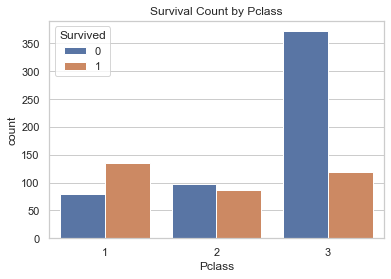

Sex


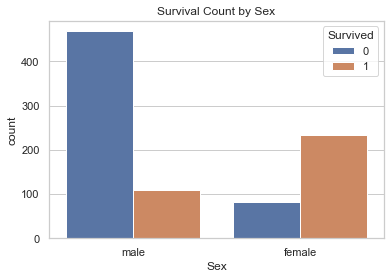

Embarked


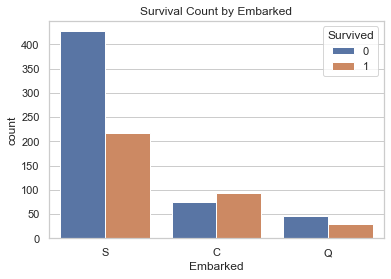

Survived


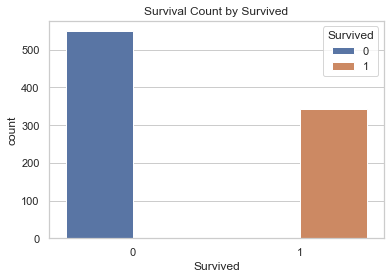

In [52]:
for i in df_class.columns:
    print(i)
    # 設置圖形風格
    sns.set(style="whitegrid")

    # 繪製性別和生存率的計數圖
    sns.countplot(x=i, hue="Survived", data=df)
    plt.title(f"Survival Count by {i}")
    plt.show()

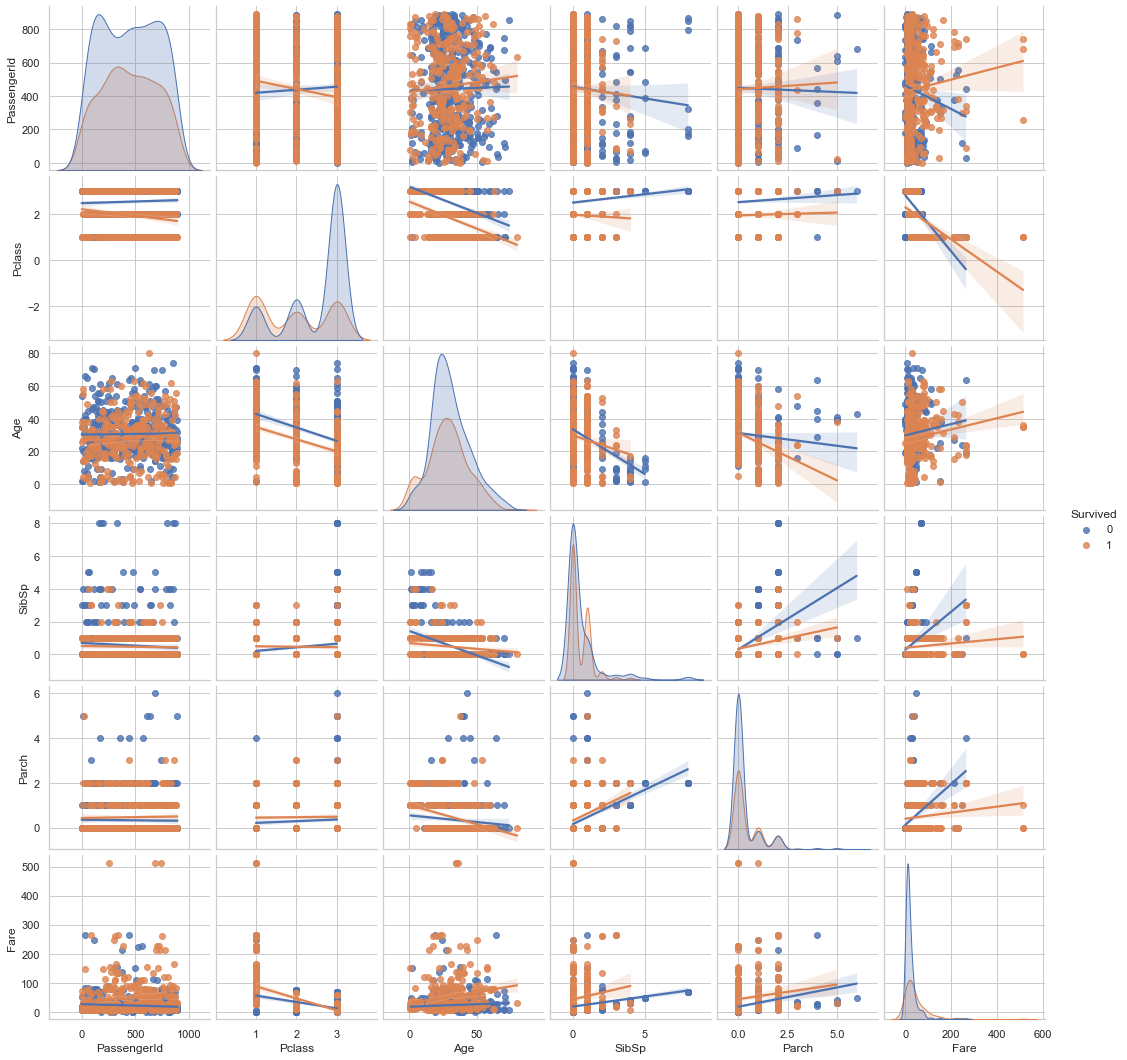

In [8]:
# kind:非對角線圖形, diag_kind:對角線圖形, hue:依照class分群df['target']
sns.pairplot(df,kind="reg", hue='Survived', diag_kind='kde')
plt.show()

### 找出關係大的欄位，如何定義與解讀什麼稱為「關係大」呢？
經以上數據視覺化觀察後，認為關係大的欄位包含Fare，Sex及Pclass與Survived關係可能較大
因為Fare在相關係數中是與Survived關係最高(排除Survived本身之外的欄位)，也可以推測Fare較高的乘客的確存活率較高(有遊艇提供給地位較高乘客)，
這點在Pclass及Survived的長條圖也可看出，在Pclass = 1的乘客中生存的數量大於未生存的數量。
至於Sex欄位，在與Survived的長條圖中可看出，女性的生存數量也是較多的。


# Task-03
Task #03：鐵達尼號存活預測專題實作（2） - 建立第一個 Baseline 版本

In [83]:
# pick the columns are importance
df_task03 = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]
#df_task03

In [84]:
print('\ncheck numbers of null',df_task03.isnull().sum())


check numbers of null Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64


In [85]:
# fillna with mode and mean for Embarked and Age column
df_task03['Embarked'].fillna(df_task03['Embarked'].mode()[0], inplace = True)
df_task03['Age'].fillna(int(df_task03['Age'].mean()),inplace = True)
print('\nAfter fillna:\n',df_task03.isnull().sum())


After fillna:
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [86]:
# one-hot encoding
df_task03 = pd.get_dummies(df_task03)
print('\nafter one hot encoding',df_task03)


after one hot encoding      Pclass   Age  SibSp  Parch     Fare  Survived  Sex_female  Sex_male  \
0         3  22.0      1      0   7.2500         0           0         1   
1         1  38.0      1      0  71.2833         1           1         0   
2         3  26.0      0      0   7.9250         1           1         0   
3         1  35.0      1      0  53.1000         1           1         0   
4         3  35.0      0      0   8.0500         0           0         1   
..      ...   ...    ...    ...      ...       ...         ...       ...   
886       2  27.0      0      0  13.0000         0           0         1   
887       1  19.0      0      0  30.0000         1           1         0   
888       3  29.0      1      2  23.4500         0           1         0   
889       1  26.0      0      0  30.0000         1           0         1   
890       3  32.0      0      0   7.7500         0           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0      

In [88]:
df_task03

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,1,0,0,0,1
888,3,29.0,1,2,23.4500,0,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,1,1,0,0


In [89]:
columns_X = set(df_task03.columns) - {'Survived'}
columns_y = ['Survived']


train_X = df_task03[columns_X]
train_y = df_task03[columns_y]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)

[0.77094972 0.78651685 0.78089888 0.76966292 0.82022472]
